# Обучение модели

In [622]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [623]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [624]:
train_df = pd.read_csv('train.csv')

In [625]:
train_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2013,Pune,3,27,Male,No,5,0
1,Bachelors,2016,Pune,2,24,Female,No,2,1
2,Bachelors,2013,Pune,3,32,Male,No,2,0
3,PHD,2016,Bangalore,3,30,Female,No,5,0
4,Bachelors,2013,Bangalore,3,25,Male,No,3,0


In [626]:
label_encoder = LabelEncoder()

for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = label_encoder.fit_transform(train_df[column])

In [627]:
train_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2013,2,3,27,1,0,5,0
1,0,2016,2,2,24,0,0,2,1
2,0,2013,2,3,32,1,0,2,0
3,2,2016,0,3,30,0,0,5,0
4,0,2013,0,3,25,1,0,3,0


In [628]:
X, y = train_df.drop(['LeaveOrNot'], axis=1).to_numpy(), train_df['LeaveOrNot'].to_numpy()

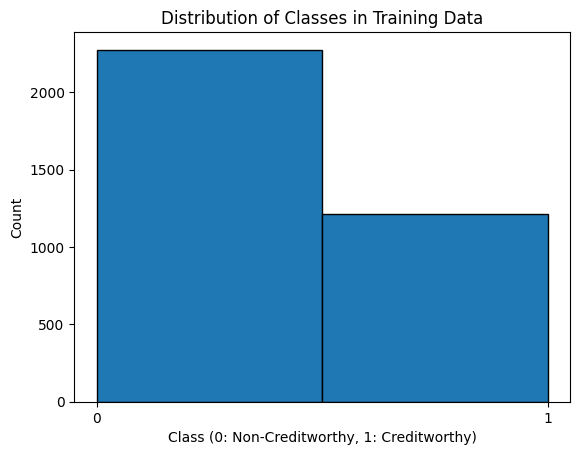

In [629]:

plt.hist(y, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [630]:
tree = DecisionTreeClassifier()

In [631]:
tree.fit(X, y)

DecisionTreeClassifier()

Эксперименты


In [632]:
!pip install imblearn
!pip install seaborn
from imblearn.over_sampling import SMOTE


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [633]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Загрузка данных
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Извлечение признаков и целевой переменной
X = train.drop(columns=["LeaveOrNot"])
y = train["LeaveOrNot"]
#
# Создание нового признака 'YearsSinceJoining'
def add_years_since_joining(X):
    X = X.copy()
    X['YearsSinceJoining'] = 2024 - X['JoiningYear']
    X['ExperienceToAgeRatio '] = X['ExperienceInCurrentDomain'] / X['Age']
    # Вычисляем средний возраст по городу
    X['Average_age_in_city'] = X.groupby('City')['Age'].transform('mean')

    bins = [0, 25, 30, 35, 40, 100]
    labels = ['20-25', '26-30', '31-35', '36-40', '40+']
    X['AgeGroup'] = pd.cut(X['Age'], bins=bins, labels=labels, include_lowest=True)
    # Инициализация LabelEncoder
    le = LabelEncoder()

    # Преобразуем каждый категориальный столбец в числовой
    X['PaymentTier_encoded'] = le.fit_transform(X['PaymentTier'])
    X['City_encoded'] = le.fit_transform(X['City'])
    X['Age_encoded'] = le.fit_transform(X['Age'])
    # print(X.head())
    X['Tier_City'] = X['PaymentTier_encoded'] + X['City_encoded']
    X['Tier_Age'] = X['PaymentTier'] + X['Age_encoded']
    X['City_Age'] = X['City_encoded'] + X['Age_encoded']
    X = X.drop(columns=['PaymentTier_encoded', 'City_encoded', 'Age_encoded'])
    return X

# Применим функцию add_years_since_joining к данным
X = add_years_since_joining(X)
test = add_years_since_joining(test)
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,YearsSinceJoining,ExperienceToAgeRatio,Average_age_in_city,AgeGroup,Tier_City,Tier_Age,City_Age
0,Bachelors,2013,Pune,3,27,Male,No,5,11,0.185185,29.223725,26-30,4,8,7
1,Bachelors,2016,Pune,2,24,Female,No,2,8,0.083333,29.223725,20-25,3,4,4
2,Bachelors,2013,Pune,3,32,Male,No,2,11,0.062500,29.223725,31-35,4,13,12
3,PHD,2016,Bangalore,3,30,Female,No,5,8,0.166667,29.488916,26-30,2,11,8
4,Bachelors,2013,Bangalore,3,25,Male,No,3,11,0.120000,29.488916,20-25,2,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,Bachelors,2012,Pune,3,24,Male,No,2,12,0.083333,29.223725,20-25,4,5,4
3485,Bachelors,2012,Bangalore,3,28,Male,No,2,12,0.071429,29.488916,26-30,2,9,6
3486,Bachelors,2013,New Delhi,3,27,Female,Yes,5,11,0.185185,29.112922,26-30,3,8,6
3487,Bachelors,2016,New Delhi,3,28,Female,No,3,8,0.107143,29.112922,26-30,3,9,7


In [634]:

# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.02, stratify=y, random_state=42)

# Предобработка и кодирование признаков
categorical_features = ['Education', 'City', 'Gender', 'PaymentTier', 'EverBenched', 'AgeGroup', 'Tier_City', 'Tier_Age', 'City_Age']
numeric_features = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain', 'YearsSinceJoining', 'Average_age_in_city']

# Пайплайн для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Пайплайн для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Комбинирование предобработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создаем полный пайплайн с моделью
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))])

# Обучение модели
model.fit(X_train, y_train)

# Оценка модели на валидационной выборке
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy на валидационной выборке: {accuracy:.2f}")

# Прогнозирование для тестового набора данных
test_predictions = model.predict(test)

# Plot heatmap


Accuracy на валидационной выборке: 0.80


In [635]:
!pip install lightgbm
!pip install catboost
!pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [636]:
import itertools
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from joblib import Parallel, delayed

def custom_grid_search(X_train, y_train, X_test, y_test, param_grid):
    best_score = 0
    best_params = {}
    best_model = None
    # Все комбинации параметров
    all_params = list(itertools.product(*param_grid.values()))
  # Создание прогресс-бара

    # Обработка каждой комбинации параметров с прогресс-баром
    for params in all_params:
        # Объединение параметров с их значениями
        param_dict = dict(zip(param_grid.keys(), params))
        # Оценка модели на основе валидационной выборки
        score, model_params, model = evaluate_model(X_train, y_train, X_val, y_val, param_dict)

        # Проверка и сохранение лучших параметров
        if score > best_score:
            best_score = score
            best_params = model_params
            best_model = model

    return best_params, best_score, best_model


In [637]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# Функция оценки модели RandomForestClassifier
def evaluate_model(X_train, y_train, X_test, y_test, params):
# Создание пайплайна с предварительной обработкой и классификатором
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train.select_dtypes(include=['object']).columns

    # Создание трансформеров для числовых и категориальных признаков
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропусков
        ('scaler', StandardScaler())  # Нормализация
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Заполнение пропусков
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot кодирование
    ])

    # Создание комбинированного трансформера
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Создание пайплайна с предварительной обработкой и классификатором
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(**params, n_jobs=-1))
    ])
    # Обучение модели
    model.fit(X_train, y_train)

    # Оценка модели на валидационной выборке
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    return score, params, model

In [638]:
# Определение сетки параметров
param_grid = {
    'n_estimators': [70, 80, 90, 100, 110, 200],        # Количество деревьев в лесу
    'max_depth': [5, 6, 7, 8, 10, 12],                # Максимальная глубина деревьев
    'min_samples_split': [5, 6, 7, 8],                 # Минимальное количество образцов для разбиения узла
    'min_samples_leaf': [1, 2, 5, 10],                   # Минимальное количество образцов в листе
    # 'max_features': ['auto'],     # Количество признаков для разбиения
    # 'bootstrap': [True, False],                          # Использование бутстрэппинга
    # 'class_weight': ['balanced', 'balanced_subsample'],  # Балансировка классов
    # 'criterion': ['gini', 'entropy'],                   # Критерий для измерения качества разделения
}
# print(X_train.head())

# Запуск подбора параметров
rf_best_params, rf_best_score, rf_best_model = custom_grid_search(X_train, y_train, X_val, y_val, param_grid)

# Лучшие параметры и лучший результат
print("Лучшие параметры:", rf_best_params)
print(f"ROC AUC: {rf_best_score:.2f}")


Лучшие параметры: {'n_estimators': 80, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2}
ROC AUC: 0.90


In [639]:
# Лучшие параметры: {'n_estimators': 70, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 2}
# ROC AUC: 0.85
test_predictions = rf_best_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, test_predictions)
rf_precision = precision_score(y_val, test_predictions)
rf_recall = recall_score(y_val, test_predictions)
rf_roc_auc = roc_auc_score(y_val, test_predictions)
print("Метрики:")
print(f"ROC AUC: {rf_roc_auc:.3f}")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")

Метрики:
ROC AUC: 0.884
Accuracy: 0.900
Precision: 0.870
Recall: 0.833


In [640]:
import itertools
from tqdm import tqdm
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Функция оценки модели RandomForestClassifier
def evaluate_model(X_train, y_train, X_test, y_test, params):
    # Создание пайплайна с предварительной обработкой и классификатором
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train.select_dtypes(include=['object']).columns

    # Создание трансформеров для числовых и категориальных признаков
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропусков
        ('scaler', StandardScaler())  # Нормализация
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Заполнение пропусков
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot кодирование
    ])

    # Создание комбинированного трансформера
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Создание пайплайна с предварительной обработкой и классификатором
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(**params, random_state=42))
    ])
    # Обучение модели
    model.fit(X_train, y_train)

    # Оценка модели на валидационной выборке
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    return score, params, model


# Определение сетки параметров
param_grid = {
    'n_estimators': [50, 80, 90, 100, 110, 200, 300],      # Количество деревьев
    'max_depth': [3, 4, 6, 8],           # Максимальная глубина дерева
    'learning_rate': [0.01, 0.1, 0.3],   # Шаг обучения
    'subsample': [0.6, 0.8, 1.0],        # Доля данных для обучения каждого дерева
    # 'colsample_bytree': [0.6, 0.8, 1.0], # Доля признаков для обучения каждого дерева
    # 'gamma': [0, 0.1, 0.3, 1],           # Минимальное улучшение для разбиения
    # 'reg_alpha': [0, 0.1, 1],            # L1-регуляризация (спарсность)
    # 'reg_lambda': [1, 1.5, 2],           # L2-регуляризация (устойчивость)
    # 'scale_pos_weight': [1, 2, 5],       # Баланс классов (для дисбалансированных данных)
    'objective': ['binary:logistic'],  # Тип задачи
}

# print(X_train.head())

# Запуск подбора параметров
rf_best_params, rf_best_score, xgb_best_model = custom_grid_search(X_train, y_train, X_val, y_val, param_grid)

# Лучшие параметры и лучший результат
print("Лучшие параметры:", rf_best_params)
print(f"ROC AUC: {rf_best_score:.2f}")


Лучшие параметры: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.6, 'objective': 'binary:logistic'}
ROC AUC: 0.89


In [641]:
# Лучшие параметры: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
# ROC AUC: 0.84
test_predictions = xgb_best_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, test_predictions)
rf_precision = precision_score(y_val, test_predictions)
rf_recall = recall_score(y_val, test_predictions)
rf_roc_auc = roc_auc_score(y_val, test_predictions)
print("Метрики:")
print(f"ROC AUC: {rf_roc_auc:.3f}")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")

Метрики:
ROC AUC: 0.863
Accuracy: 0.886
Precision: 0.864
Recall: 0.792


# Submission

In [643]:
# Прогнозирование для тестового набора данных
test_predictions = rf_best_model.predict(test)

# Формирование файла посылки
submission = pd.DataFrame({'ID': list(range(len(test_predictions))), 'LeaveOrNot': test_predictions})
submission.to_csv('submission.csv', index=False)